In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7, 10]

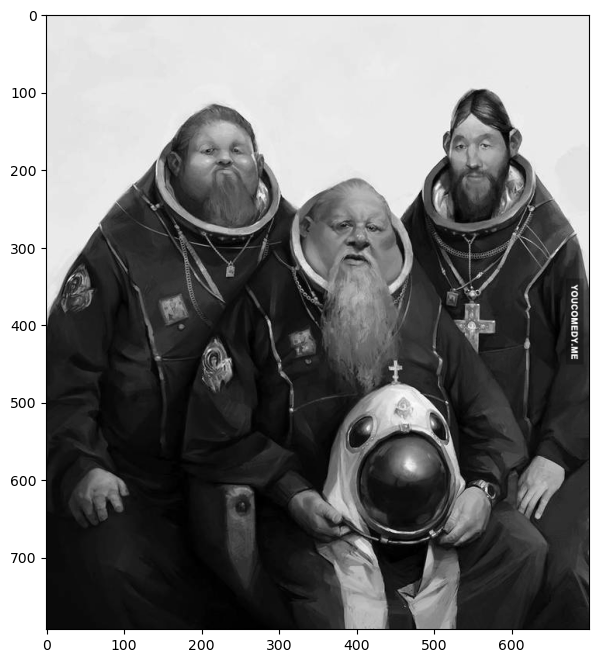

In [37]:
img = cv2.imread('../data/Artist_Vladimir_Malakhovsky.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, dstCn=1)
img = img.astype(dtype=np.float32) 
plt.imshow(img, cmap='gray')
plt.show()

In [32]:
# # Binary image:
colors = np.array([0.0, 255.0], dtype=np.float32)

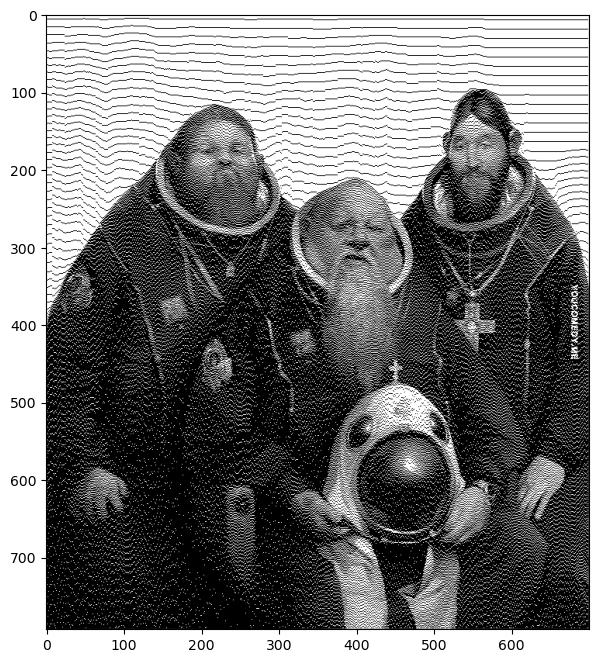

In [38]:
rows, cols = img.shape[0], img.shape[1]
img_tmp = img.copy()

for row in range(1, rows-1):
    for col in range(1, cols-1):
        pixel = img_tmp[row, col]
        abs_dev = np.abs(colors - pixel)
        new_num = np.argmin(abs_dev)
        new_pixel = colors[new_num]
        quant_error = pixel - new_pixel
        img_tmp[row, col] = new_pixel
        # '''Line_Style :-)'''
        if row<rows-2:
            img_tmp[row+1, col] = img_tmp[row+1, col] + quant_error

plt.imshow(img_tmp, cmap='gray')
plt.show()

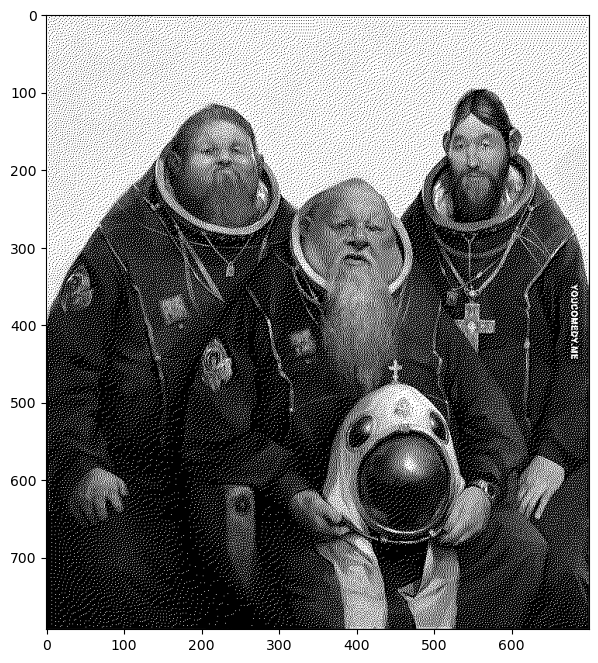

In [39]:
rows, cols = img.shape[0], img.shape[1]
img_tmp2 = img.copy()

for row in range(1, rows-1):
    for col in range(1, cols-1):
        pixel = img_tmp2[row, col]
        abs_dev = np.abs(colors - pixel)
        new_num = np.argmin(abs_dev)
        new_pixel = colors[new_num]
        quant_error = pixel - new_pixel
        img_tmp2[row, col] = new_pixel
        if row<rows-2 and col<cols-2:
            img_tmp2[row, col+1]   = img_tmp2[row, col+1]   + 7*quant_error/16
            img_tmp2[row+1, col-1] = img_tmp2[row+1, col-1] + 2*quant_error/16
            img_tmp2[row+1, col]   = img_tmp2[row+1, col]   + 5*quant_error/16
            img_tmp2[row+1, col+1] = img_tmp2[row+1, col+1] + 2*quant_error/16
plt.imshow(img_tmp2, cmap='gray') #
plt.show()

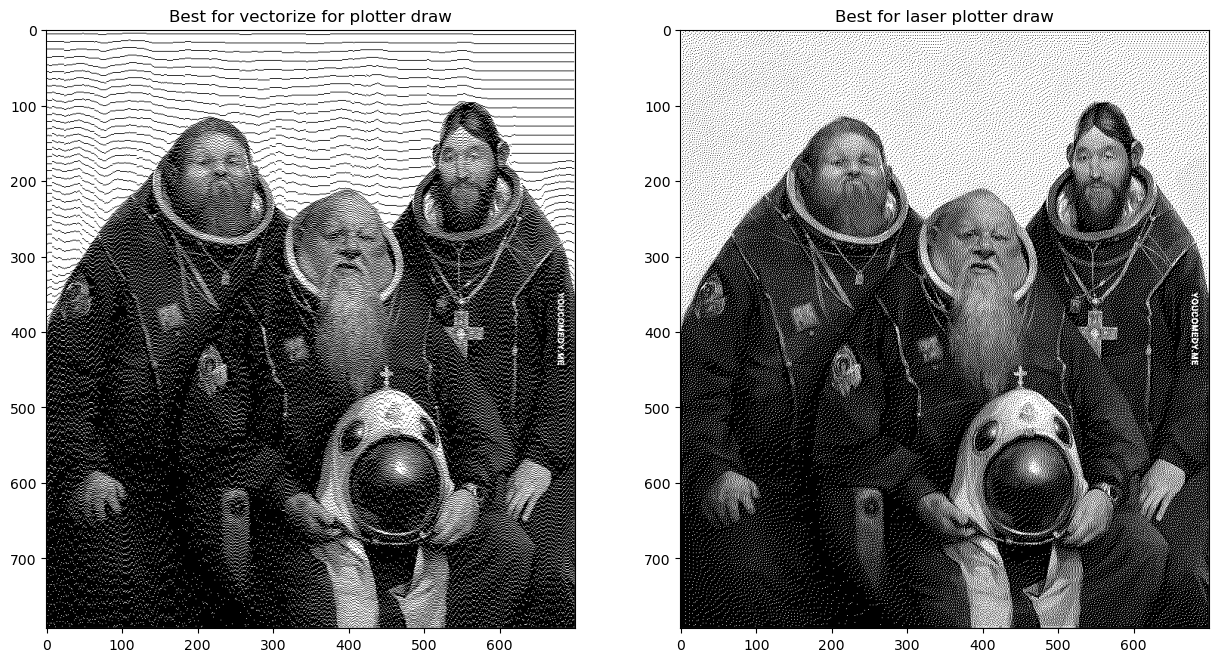

In [40]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.subplot(1, 2, 1), plt.imshow(img_tmp,  cmap='gray'), plt.title('Best for vectorize for plotter draw')
plt.subplot(1, 2, 2), plt.imshow(img_tmp2, cmap='gray'), plt.title('Best for laser plotter draw')
plt.show()

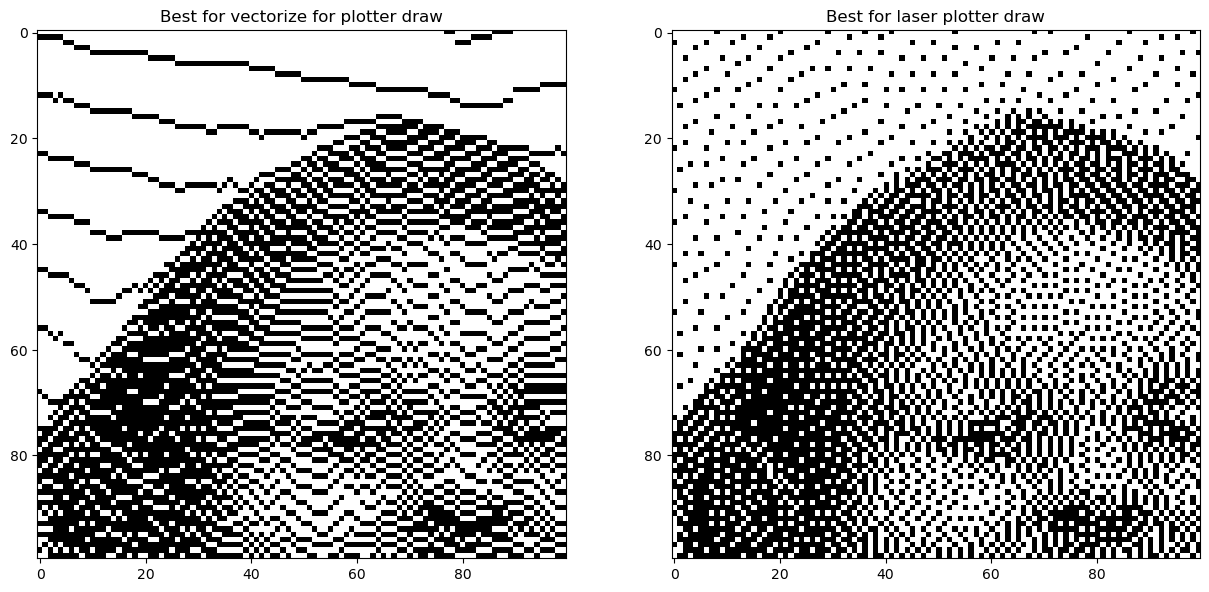

In [42]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.subplot(1, 2, 1), plt.imshow(img_tmp[100:200, 150:250],  cmap='gray'), plt.title('Best for vectorize for plotter draw')
plt.subplot(1, 2, 2), plt.imshow(img_tmp2[100:200, 150:250], cmap='gray'), plt.title('Best for laser plotter draw')
plt.show()